<a href="https://colab.research.google.com/github/EmilyRothrock/project_chd/blob/main/CHD_decision_tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Import dataset
# ! git clone https://github.com/EmilyRothrock/project_chd
data = pd.read_csv('/content/project_chd/fhs_train_cleaned.csv')
data = data.drop("Unnamed: 0", axis = 1)
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')
test_data = test_data.drop("Unnamed: 0", axis = 1)

data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
3,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
4,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [16]:
test_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [17]:
# Drop NAs
test_data = test_data.dropna()

In [18]:
# Look at correlations
data.corr()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
sex,1.000000,-0.030139,0.005061,0.205028,0.336615,-0.044798,0.012356,0.008453,0.016438,-0.076235,-0.034453,0.057362,0.074355,-0.111224,0.013454,0.100394
age,-0.030139,1.000000,-0.166460,-0.212695,-0.195504,0.128098,0.056119,0.294195,0.097253,0.269450,0.386833,0.208598,0.143422,-0.010926,0.103984,0.233327
education,0.005061,-0.166460,1.000000,0.019864,0.008876,-0.015253,-0.024027,-0.073242,-0.042965,-0.015273,-0.126289,-0.059369,-0.150767,-0.085380,-0.039952,-0.058663
currentSmoker,0.205028,-0.212695,0.019864,1.000000,0.770227,-0.057604,-0.039969,-0.107898,-0.031604,-0.027983,-0.140898,-0.115857,-0.176905,0.047681,-0.056631,0.007957
cigsPerDay,0.336615,-0.195504,0.008876,0.770227,1.000000,-0.048006,-0.034373,-0.071204,-0.032327,-0.017445,-0.096031,-0.050059,-0.094391,0.067819,-0.059574,0.050614
BPMeds,-0.044798,0.128098,-0.015253,-0.057604,-0.048006,1.000000,0.121645,0.255967,0.047991,0.088243,0.267308,0.207486,0.093656,-0.005011,0.031285,0.095222
prevalentStroke,0.012356,0.056119,-0.024027,-0.039969,-0.034373,0.121645,1.000000,0.054817,-0.013326,0.005556,0.060481,0.050653,0.014946,-0.024515,0.000245,0.043344
prevalentHyp,0.008453,0.294195,-0.073242,-0.107898,-0.071204,0.255967,0.054817,1.000000,0.083085,0.163553,0.689293,0.617183,0.308250,0.145399,0.084884,0.168785
diabetes,0.016438,0.097253,-0.042965,-0.031604,-0.032327,0.047991,-0.013326,0.083085,1.000000,0.052329,0.094032,0.044307,0.086245,0.054426,0.607184,0.099882
totChol,-0.076235,0.269450,-0.015273,-0.027983,-0.017445,0.088243,0.005556,0.163553,0.052329,1.000000,0.218192,0.156686,0.114871,0.080965,0.035636,0.113374


Highest correlations to TEN_YEAR_CHD come from age, prevalentHyp, sysBP, and diaBP.

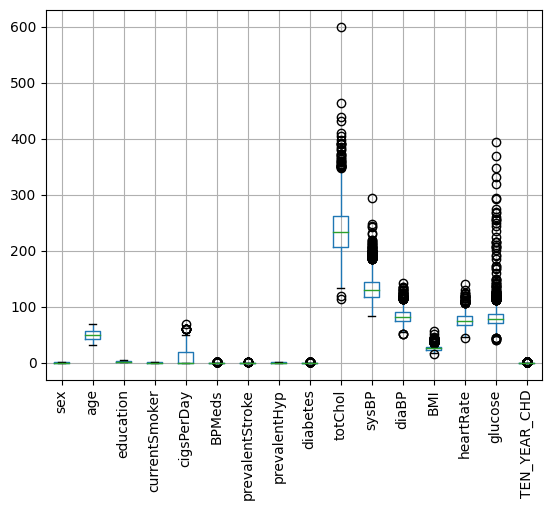

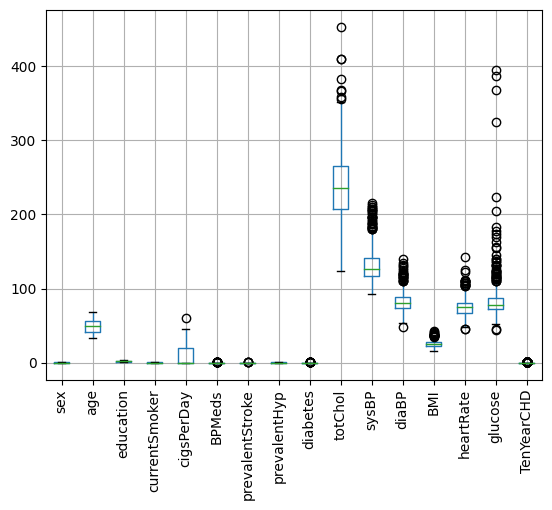

In [19]:
# Look at outliers
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

In [20]:
# Log transformation
data['totChol_log'] = np.log(data['totChol'])
data['sysBP_log'] = np.log(data['sysBP'])
data['diaBP_log'] = np.log(data['diaBP'])
data['BMI_log'] = np.log(data['BMI'])
data['heartRate_log'] = np.log(data['heartRate'])
data['glucose_log'] = np.log(data['glucose'])

test_data['totChol_log'] = np.log(test_data['totChol'])
test_data['sysBP_log'] = np.log(test_data['sysBP'])
test_data['diaBP_log'] = np.log(test_data['diaBP'])
test_data['BMI_log'] = np.log(test_data['BMI'])
test_data['heartRate_log'] = np.log(test_data['heartRate'])
test_data['glucose_log'] = np.log(test_data['glucose'])

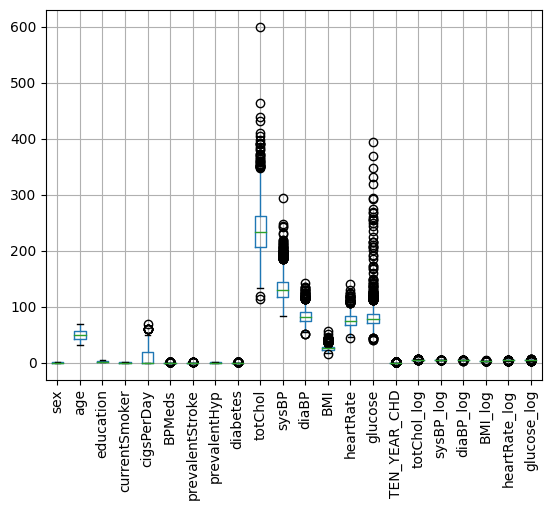

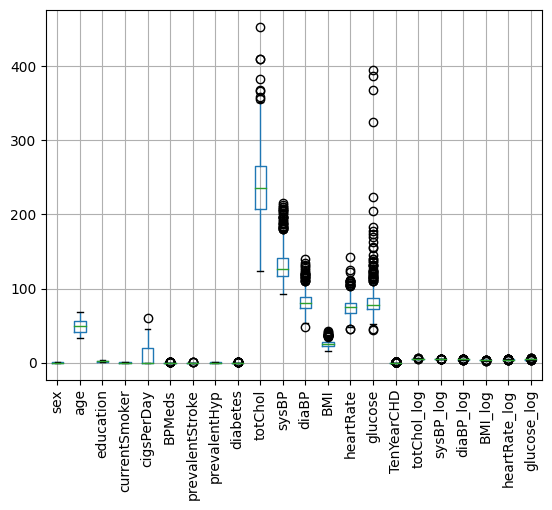

In [21]:
# View boxplots again
data.boxplot(rot = 90)
plt.show()

test_data.boxplot(rot = 90)
plt.show()

[Text(0.5666028009775717, 0.984375, 'x[0] <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.31107483340183184, 0.953125, 'x[0] <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.1385819707022076, 0.921875, 'x[2] <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.05687272487083138, 0.890625, 'x[3] <= 4.016\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.05499390852512917, 0.859375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.05875154121653359, 0.859375, 'x[3] <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.025364020666979802, 0.828125, 'x[0] <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.023485204321277594, 0.796875, 'x[3] <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.010333489901362142, 0.765625, 'x[0] <= 36.5\nsquared_error = 0.052\nsamples = 72\nvalue = 0.056'),
 Text(0.0037576326914044154, 0.734375, 'x[2] <= 4

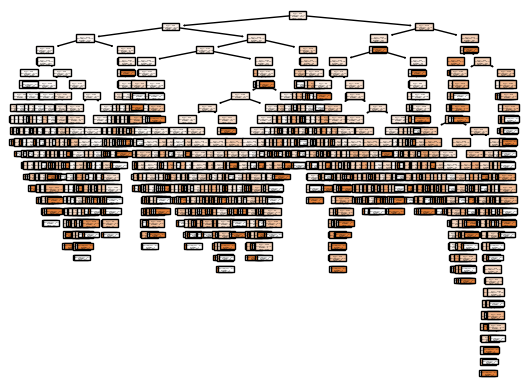

In [24]:
# Decision Tree
tree_data = data.loc[:, ['TEN_YEAR_CHD', 'age', 'prevalentHyp', 'sysBP_log', 'diaBP_log']]
tree_test_data = test_data.loc[:, ['TenYearCHD', 'age', 'prevalentHyp', 'sysBP_log', 'diaBP_log']]
# Import packages and libraries
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)


# Fit tree
tree = DecisionTreeRegressor()
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True)

In [25]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.796066713311457


This tree is very overfitting and is probably making splits on very small distinctions among a few observations, so we can truncate it and limit depth.

[Text(0.5371621621621622, 0.9166666666666666, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2635135135135135, 0.75, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.10810810810810811, 0.5833333333333334, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.05405405405405406, 0.4166666666666667, 'sysBP_log <= 4.434\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.02702702702702703, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08108108108108109, 0.25, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.05405405405405406, 0.08333333333333333, 'squared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.10810810810810811, 0.08333333333333333, 'squared_error = 0.069\nsamples = 739\nvalue = 0.074'),
 Text(0.16216216216216217, 0.4166666666666667, 'diaBP_log <= 4.17\nsquared_error = 0.143\nsamples = 81\nvalue = 0.173'),
 Text(0.13513

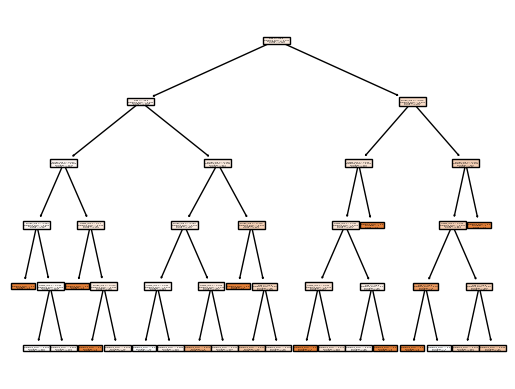

In [27]:
# Another Decision Tree, but with a limited depth

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 5)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [28]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05184698276555788


[Text(0.5, 0.875, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.625, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.375, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.0625, 0.125, 'squared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.1875, 0.125, 'squared_error = 0.143\nsamples = 81\nvalue = 0.173'),
 Text(0.375, 0.375, 'sysBP_log <= 5.109\nsquared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.3125, 0.125, 'squared_error = 0.125\nsamples = 780\nvalue = 0.146'),
 Text(0.4375, 0.125, 'squared_error = 0.231\nsamples = 61\nvalue = 0.361'),
 Text(0.75, 0.625, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.375, 'diaBP_log <= 4.593\nsquared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.5625, 0.125, 'squared_error = 0.162\nsamples = 424\nvalue = 0.203'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 2\n

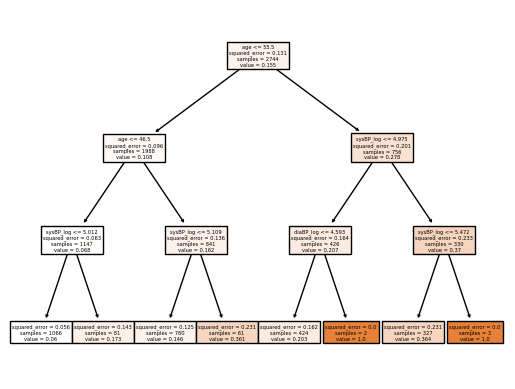

In [29]:
# Let's try to make it even better!

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 3)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [30]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.06911665623589058


[Text(0.6352926587301587, 0.9545454545454546, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.39955357142857145, 0.8636363636363636, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.23065476190476192, 0.7727272727272727, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.12533068783068782, 0.6818181818181818, 'sysBP_log <= 4.434\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.12003968253968254, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.1306216931216931, 0.5909090909090909, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.06746031746031746, 0.5, 'age <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.062169312169312166, 0.4090909090909091, 'diaBP_log <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.0291005291005291, 0.3181818181818182, 'age <= 36.5\nsquared_error =

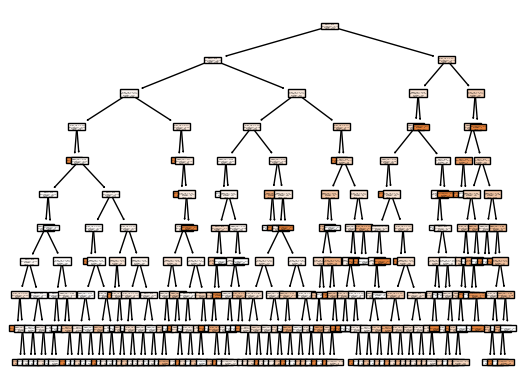

In [31]:
# Trying to improve r^2 value

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 10)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [32]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

# Oh that's not good at all

-0.17824504077446068


[Text(0.5193661971830986, 0.9375, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2640845070422535, 0.8125, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.12323943661971831, 0.6875, 'sysBP_log <= 5.012\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.06338028169014084, 0.5625, 'sysBP_log <= 4.434\nsquared_error = 0.056\nsamples = 1066\nvalue = 0.06'),
 Text(0.04929577464788732, 0.4375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.07746478873239436, 0.4375, 'diaBP_log <= 4.294\nsquared_error = 0.056\nsamples = 1065\nvalue = 0.059'),
 Text(0.04225352112676056, 0.3125, 'age <= 43.5\nsquared_error = 0.024\nsamples = 326\nvalue = 0.025'),
 Text(0.028169014084507043, 0.1875, 'diaBP_log <= 4.193\nsquared_error = 0.031\nsamples = 252\nvalue = 0.032'),
 Text(0.014084507042253521, 0.0625, 'squared_error = 0.052\nsamples = 72\nvalue = 0.056'),
 Text(0.04225352112676056, 0.0625, 'squared_error = 0.022\nsample

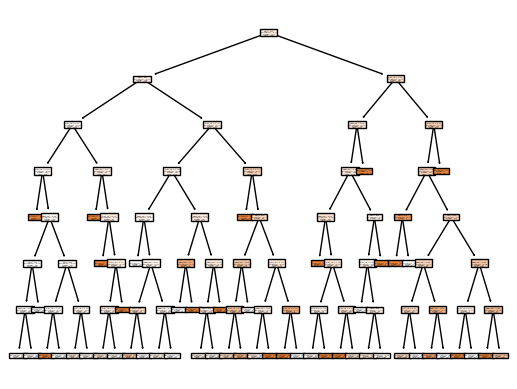

In [33]:
# Trying again

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 7)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [34]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

-0.02793789188036322


[Text(0.5, 0.8333333333333334, 'age <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.25, 0.5, 'age <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.136\nsamples = 841\nvalue = 0.162'),
 Text(0.75, 0.5, 'sysBP_log <= 4.975\nsquared_error = 0.201\nsamples = 756\nvalue = 0.278'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.164\nsamples = 426\nvalue = 0.207'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.233\nsamples = 330\nvalue = 0.37')]

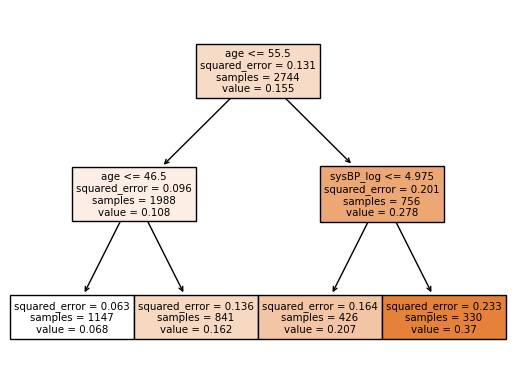

In [35]:
# Try making max_depth even lower instead of higher?

# Process data
y = tree_data['TEN_YEAR_CHD']
X = tree_data.drop(['TEN_YEAR_CHD'], axis = 1)
y_test = tree_test_data['TenYearCHD']
X_test = tree_test_data.drop(['TenYearCHD'], axis = 1)

# Fit tree
tree = DecisionTreeRegressor(max_depth = 2)
tree = tree.fit(X, y)

# Make predictions on the test data
y_hat = tree.predict(X_test)

# Visualize results
plot_tree(tree, filled = True, feature_names = tree.feature_names_in_)

In [36]:
# Statistics for above tree
SSE = np.sum((y_test - y_hat) ** 2)
TSS  =np.sum((y_test - np.mean(y)) ** 2)
rsq = 1 - SSE/TSS
print(rsq)

0.05963970137419505


Looks like even if we just focus on the variables with the highest correlation, setting max_depth = 3 had the highest r^2 value, while also showing us an accurate representation of the relationships between the data.